In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
disease_df = pd.read_excel('TBT_03_updated_data.xlsx')

In [3]:
healthy_df = pd.read_excel('Ismit_updated_data.xlsx')

In [4]:
disease_df.shape,healthy_df.shape

((28417, 46), (29220, 46))

In [5]:
data = pd.concat([disease_df,healthy_df])

In [6]:
data.tail()

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Recording media name,Recording media width,Recording media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Ungrouped,Disease
29215,302515934,907598210,Eye Tracker,Project1,17-05-2024,ISMIT,Recording026,15-05-2024,15-05-2024,14:39:42.980,...,fullstream.mp4,1920.0,1080.0,Unclassified,10,280,NaN,NaN,NaN,0
29216,302525925,907608201,Eye Tracker,Project1,17-05-2024,ISMIT,Recording026,15-05-2024,15-05-2024,14:39:42.980,...,fullstream.mp4,1920.0,1080.0,Saccade,20,378,NaN,NaN,NaN,0
29217,302535915,907618191,Eye Tracker,Project1,17-05-2024,ISMIT,Recording026,15-05-2024,15-05-2024,14:39:42.980,...,fullstream.mp4,1920.0,1080.0,Saccade,20,378,NaN,NaN,NaN,0
29218,302545904,907628180,Eye Tracker,Project1,17-05-2024,ISMIT,Recording026,15-05-2024,15-05-2024,14:39:42.980,...,fullstream.mp4,1920.0,1080.0,EyesNotFound,10,380,NaN,NaN,NaN,0
29219,302555901,907638177,Eye Tracker,Project1,17-05-2024,ISMIT,Recording026,15-05-2024,15-05-2024,14:39:42.980,...,fullstream.mp4,1920.0,1080.0,Unclassified,10,281,NaN,NaN,NaN,0


In [7]:
data.columns

Index(['Recording timestamp', 'Computer timestamp', 'Sensor', 'Project name',
       'Export date', 'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration',
       'Recording Fixation filter name', 'Event', 'Event value',
       'Gaze point X', 'Gaze point Y', 'Gaze point 3D X', 'Gaze point 3D Y',
       'Gaze point 3D Z', 'Gaze direction left X', 'Gaze direction left Y',
       'Gaze direction left Z', 'Gaze direction right X',
       'Gaze direction right Y', 'Gaze direction right Z',
       'Pupil position left X', 'Pupil position left Y',
       'Pupil position left Z', 'Pupil position right X',
       'Pupil position right Y', 'Pupil position right Z',
       'Pupil diameter left', 'Pupil diameter right', 'Validity left',
       'Validity right', 'Recording media name', 'Recording media width',
       'Recording media height', 'Eye movement type', 'Gaze event duration',
   

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57637 entries, 0 to 29219
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Recording timestamp             57637 non-null  int64  
 1   Computer timestamp              57637 non-null  int64  
 2   Sensor                          57637 non-null  object 
 3   Project name                    57637 non-null  object 
 4   Export date                     57637 non-null  object 
 5   Participant name                57637 non-null  object 
 6   Recording name                  57637 non-null  object 
 7   Recording date                  57637 non-null  object 
 8   Recording date UTC              57637 non-null  object 
 9   Recording start time            57637 non-null  object 
 10  Recording start time UTC        57637 non-null  object 
 11  Recording duration              57637 non-null  int64  
 12  Recording Fixation filter name  57637

In [9]:
df = data.iloc[:,15:].drop(['Recording media name', 'Recording media width','Recording media height','Ungrouped','Validity left',
       'Validity right',],axis=1)

In [10]:
df.head()

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,...,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Disease
0,1102,411,-56.1282,37.5855,397.4568,-0.20564,0.12618,0.97046,-0.05332,0.15461,...,-22.03,-23.66,2.847,2.769,Unclassified,15,1,NaN,NaN,1
1,1102,411,-56.3145,37.5752,399.3653,-0.18079,0.10164,0.97826,-0.07822,0.17654,...,-21.86,-24.28,2.937,2.986,Unclassified,15,1,NaN,NaN,1
2,1119,401,-64.1452,42.5177,412.0795,-0.21512,0.13051,0.96783,-0.07076,0.16272,...,-22.09,-23.58,2.854,2.770,Saccade,10,1,NaN,NaN,1
3,1142,397,-71.9513,43.4501,408.7234,-0.21512,0.13051,0.96783,-0.08511,0.14843,...,-21.95,-24.17,2.854,2.917,Unclassified,40,2,NaN,NaN,1
4,1146,388,-75.0490,47.8626,418.9648,-0.23384,0.13901,0.96228,-0.09428,0.17266,...,-22.13,-23.54,2.825,2.745,Unclassified,40,2,NaN,NaN,1


In [11]:
df.head()

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,...,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Disease
0,1102,411,-56.1282,37.5855,397.4568,-0.20564,0.12618,0.97046,-0.05332,0.15461,...,-22.03,-23.66,2.847,2.769,Unclassified,15,1,NaN,NaN,1
1,1102,411,-56.3145,37.5752,399.3653,-0.18079,0.10164,0.97826,-0.07822,0.17654,...,-21.86,-24.28,2.937,2.986,Unclassified,15,1,NaN,NaN,1
2,1119,401,-64.1452,42.5177,412.0795,-0.21512,0.13051,0.96783,-0.07076,0.16272,...,-22.09,-23.58,2.854,2.770,Saccade,10,1,NaN,NaN,1
3,1142,397,-71.9513,43.4501,408.7234,-0.21512,0.13051,0.96783,-0.08511,0.14843,...,-21.95,-24.17,2.854,2.917,Unclassified,40,2,NaN,NaN,1
4,1146,388,-75.0490,47.8626,418.9648,-0.23384,0.13901,0.96228,-0.09428,0.17266,...,-22.13,-23.54,2.825,2.745,Unclassified,40,2,NaN,NaN,1


In [12]:
df.tail()

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,...,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Disease
29215,651,405,97.1192,38.2845,384.9611,0.20779,0.05633,0.97655,0.22065,0.20844,...,-20.33,-48.12,4.953,4.023,Unclassified,10,280,NaN,NaN,0
29216,679,394,56.7633,27.1626,248.8611,0.16063,0.12169,0.97948,0.20301,0.19749,...,-21.60,-46.37,4.277,3.752,Saccade,20,378,NaN,NaN,0
29217,766,334,18.9728,20.1949,125.2335,0.16063,0.12169,0.97948,0.25742,0.22386,...,-20.99,-48.26,4.277,4.035,Saccade,20,378,NaN,NaN,0
29218,766,334,18.9728,20.1949,125.2335,0.16063,0.12169,0.97948,0.25742,0.22386,...,-20.99,-48.26,4.277,4.035,EyesNotFound,10,380,NaN,NaN,0
29219,720,240,23.0918,29.2533,120.6020,0.16063,0.12169,0.97948,0.28105,0.27230,...,-20.95,-49.77,4.277,4.231,Unclassified,10,281,NaN,NaN,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57637 entries, 0 to 29219
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gaze point X             57637 non-null  int64  
 1   Gaze point Y             57637 non-null  int64  
 2   Gaze point 3D X          57637 non-null  float64
 3   Gaze point 3D Y          57637 non-null  float64
 4   Gaze point 3D Z          57637 non-null  float64
 5   Gaze direction left X    57637 non-null  float64
 6   Gaze direction left Y    57637 non-null  float64
 7   Gaze direction left Z    57637 non-null  float64
 8   Gaze direction right X   57637 non-null  float64
 9   Gaze direction right Y   57637 non-null  float64
 10  Gaze direction right Z   57637 non-null  float64
 11  Pupil position left X    57637 non-null  float64
 12  Pupil position left Y    57637 non-null  float64
 13  Pupil position left Z    57637 non-null  float64
 14  Pupil position right X   57

In [14]:
df['Eye movement type'].unique()

array(['Unclassified', 'Saccade', 'EyesNotFound', 'Fixation'],
      dtype=object)

In [15]:
valuesToEncode = {'Fixation':0, 'EyesNotFound':1, 'Saccade':2, 'Unclassified':3}

In [16]:
# df[['Eye movement type']].applymap(valuesToEncode)
df.drop(['Eye movement type','Gaze event duration','Eye movement type index'],axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57637 entries, 0 to 29219
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gaze point X            57637 non-null  int64  
 1   Gaze point Y            57637 non-null  int64  
 2   Gaze point 3D X         57637 non-null  float64
 3   Gaze point 3D Y         57637 non-null  float64
 4   Gaze point 3D Z         57637 non-null  float64
 5   Gaze direction left X   57637 non-null  float64
 6   Gaze direction left Y   57637 non-null  float64
 7   Gaze direction left Z   57637 non-null  float64
 8   Gaze direction right X  57637 non-null  float64
 9   Gaze direction right Y  57637 non-null  float64
 10  Gaze direction right Z  57637 non-null  float64
 11  Pupil position left X   57637 non-null  float64
 12  Pupil position left Y   57637 non-null  float64
 13  Pupil position left Z   57637 non-null  float64
 14  Pupil position right X  57637 non-null  flo

In [18]:
df['Gaze point X'].iloc[:1000]

0      1102
1      1102
2      1119
3      1142
4      1146
       ... 
995    1006
996    1005
997    1005
998    1003
999    1000
Name: Gaze point X, Length: 1000, dtype: int64

In [19]:
df['Fixation point X'].fillna(df['Fixation point X'].mean(),inplace=True)
df['Fixation point Y'].fillna(df['Fixation point Y'].mean(),inplace=True)

In [20]:
df.isnull().sum()

Gaze point X              0
Gaze point Y              0
Gaze point 3D X           0
Gaze point 3D Y           0
Gaze point 3D Z           0
Gaze direction left X     0
Gaze direction left Y     0
Gaze direction left Z     0
Gaze direction right X    0
Gaze direction right Y    0
Gaze direction right Z    0
Pupil position left X     0
Pupil position left Y     0
Pupil position left Z     0
Pupil position right X    0
Pupil position right Y    0
Pupil position right Z    0
Pupil diameter left       0
Pupil diameter right      0
Fixation point X          0
Fixation point Y          0
Disease                   0
dtype: int64

In [21]:
df.drop(['Fixation point X','Fixation point Y'],axis=1,inplace=True)

In [22]:
df = df.sample(frac=1).reset_index(drop=True)

In [23]:
df.head(10)

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil position left X,Pupil position left Y,Pupil position left Z,Pupil position right X,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Disease
0,1051,302,-49.2616,95.9365,507.7711,-0.15154,0.21442,0.96491,-0.03271,0.19727,0.97980,34.71,-22.88,-26.61,-34.46,-20.39,-24.32,2.785,2.764,1
1,970,354,-9.7804,53.8741,373.6652,-0.06369,0.17983,0.98163,0.05997,0.18509,0.98089,34.68,-23.17,-26.52,-33.91,-21.46,-24.22,2.580,2.609,1
2,936,487,2.0698,20.0998,705.3887,-0.01431,0.03084,0.99942,0.02054,0.06784,0.99748,28.82,-17.89,-33.14,-29.28,-14.90,-32.64,2.845,2.969,0
3,1053,185,-68.4640,202.3753,698.7917,-0.13032,0.30521,0.94333,-0.04903,0.28282,0.95792,34.25,-22.62,-26.44,-34.29,-20.47,-24.12,2.743,2.759,1
4,989,328,-12.8718,49.9011,298.6428,-0.09101,0.16967,0.98129,0.01012,0.27069,0.96261,34.70,-23.19,-26.84,-33.24,-22.80,-22.73,2.831,2.547,1
5,1042,308,-45.0013,93.3756,507.7543,-0.14382,0.21046,0.96696,-0.00399,0.23411,0.97220,34.49,-22.96,-26.82,-34.22,-21.53,-23.65,2.842,2.789,1
6,974,424,-36.8441,101.4332,1220.3584,-0.05141,0.09168,0.99446,-0.00644,0.09798,0.99517,28.52,-19.01,-30.22,-29.44,-16.50,-29.96,3.228,3.122,0
7,1133,378,-93.7209,68.7162,558.9550,-0.22485,0.15625,0.96178,0.08149,-0.12060,0.98935,34.54,-22.94,-26.93,-35.66,-20.90,-22.16,2.774,2.410,1
8,1062,386,-154.2553,168.2974,1451.2627,-0.12083,0.12050,0.98533,-0.08310,0.12425,0.98877,28.27,-17.56,-33.26,-29.87,-13.96,-33.19,3.061,3.234,0
9,986,478,-39.3772,35.0799,983.6415,-0.06027,0.04019,0.99737,-0.01621,0.06278,0.99790,28.55,-18.57,-31.36,-29.45,-16.01,-31.08,2.958,2.929,0


In [24]:
X = df.iloc[:,:-1]
y = df['Disease']

In [25]:
X.head()

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil position left X,Pupil position left Y,Pupil position left Z,Pupil position right X,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right
0,1051,302,-49.2616,95.9365,507.7711,-0.15154,0.21442,0.96491,-0.03271,0.19727,0.97980,34.71,-22.88,-26.61,-34.46,-20.39,-24.32,2.785,2.764
1,970,354,-9.7804,53.8741,373.6652,-0.06369,0.17983,0.98163,0.05997,0.18509,0.98089,34.68,-23.17,-26.52,-33.91,-21.46,-24.22,2.580,2.609
2,936,487,2.0698,20.0998,705.3887,-0.01431,0.03084,0.99942,0.02054,0.06784,0.99748,28.82,-17.89,-33.14,-29.28,-14.90,-32.64,2.845,2.969
3,1053,185,-68.4640,202.3753,698.7917,-0.13032,0.30521,0.94333,-0.04903,0.28282,0.95792,34.25,-22.62,-26.44,-34.29,-20.47,-24.12,2.743,2.759
4,989,328,-12.8718,49.9011,298.6428,-0.09101,0.16967,0.98129,0.01012,0.27069,0.96261,34.70,-23.19,-26.84,-33.24,-22.80,-22.73,2.831,2.547


In [26]:
y

0        1
1        1
2        0
3        1
4        1
        ..
57632    1
57633    1
57634    0
57635    0
57636    0
Name: Disease, Length: 57637, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75)

In [29]:
X_train.shape

(43227, 19)

In [30]:
X_test.shape

(14410, 19)

# Support Vector Machine(SVM)

In [31]:
from sklearn.svm import SVC

In [32]:
svc = SVC()

In [33]:
svc.fit(X_train,y_train)

SVC()

In [34]:
pred = svc.predict(X_test)

In [35]:
pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

In [37]:
accuracy = accuracy_score(pred,y_test)

In [38]:
accuracy*100

97.61970853573906

In [39]:
svc_recall = recall_score(y_test,pred)
svc_recall

0.9740673970323117

In [40]:
svc_recall*100

97.40673970323117

In [41]:
cm = confusion_matrix(pred,y_test)

In [42]:
cm

array([[7043,  187],
       [ 156, 7024]], dtype=int64)

In [43]:
svc.classes_

array([0, 1], dtype=int64)

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc.classes_)

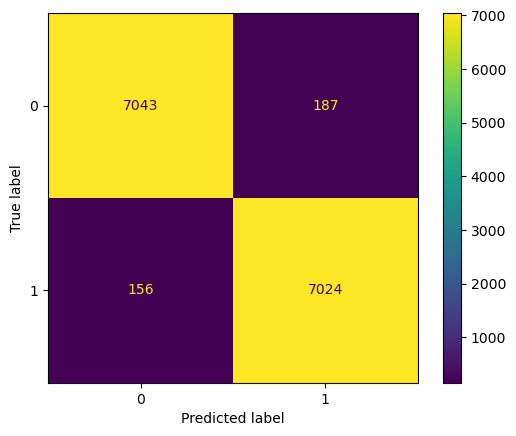

In [45]:
disp.plot()

# Precision Recall Curve

# Support Vector Classifier (SVC)

In [46]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)

svc_preds = svc.predict(X_test) # Predictions
svc_prob = svc.predict_proba(X_test)[:,1] 

# THIS WILL BE USED FOR PR-CURVE

In [47]:
svc_prob

array([1.96264592e-03, 2.48889859e-02, 9.99992712e-01, ...,
       1.35575586e-01, 1.00519774e-04, 9.95635915e-01])

In [48]:
accuracy = accuracy_score(y_test,svc_preds)
print(f'Accuracy : {round(accuracy*100,2)}%')

Accuracy : 97.62%


In [49]:
from sklearn.metrics import accuracy_score,precision_recall_curve,auc

In [50]:
precision_1,recall_1,threshold_1 = precision_recall_curve(y_test,svc_prob)

## This is Area Under Curve (AUC) which measures the performance of the model. 
# Higher AUC means better model.
# range of AUC is 0 to 1


In [51]:
auc_1= auc(recall_1,precision_1)
print(auc_1)

0.9931594023373295


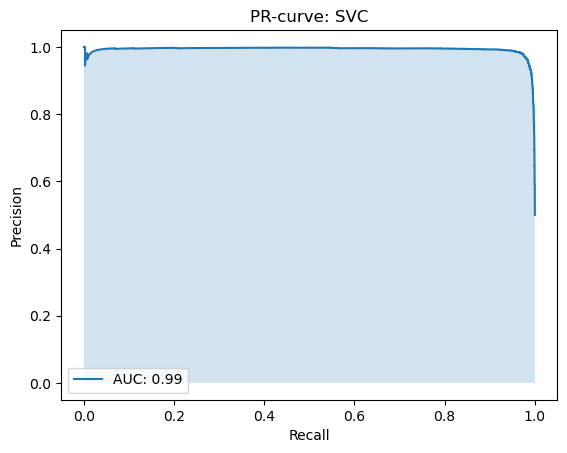

In [52]:
plt.title('PR-curve: SVC')

plt.plot(recall_1,precision_1,label=f'AUC: {round(auc_1,2)}')

plt.fill_between(recall_1,precision_1,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [53]:
df[df['Disease']==1]

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil position left X,Pupil position left Y,Pupil position left Z,Pupil position right X,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Disease
0,1051,302,-49.2616,95.9365,507.7711,-0.15154,0.21442,0.96491,-0.03271,0.19727,0.97980,34.71,-22.88,-26.61,-34.46,-20.39,-24.32,2.785,2.764,1
1,970,354,-9.7804,53.8741,373.6652,-0.06369,0.17983,0.98163,0.05997,0.18509,0.98089,34.68,-23.17,-26.52,-33.91,-21.46,-24.22,2.580,2.609,1
3,1053,185,-68.4640,202.3753,698.7917,-0.13032,0.30521,0.94333,-0.04903,0.28282,0.95792,34.25,-22.62,-26.44,-34.29,-20.47,-24.12,2.743,2.759,1
4,989,328,-12.8718,49.9011,298.6428,-0.09101,0.16967,0.98129,0.01012,0.27069,0.96261,34.70,-23.19,-26.84,-33.24,-22.80,-22.73,2.831,2.547,1
5,1042,308,-45.0013,93.3756,507.7543,-0.14382,0.21046,0.96696,-0.00399,0.23411,0.97220,34.49,-22.96,-26.82,-34.22,-21.53,-23.65,2.842,2.789,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57623,1005,224,-20.4284,92.7524,362.1399,-0.13382,0.28295,0.94975,0.23186,-0.00157,0.97275,34.26,-22.92,-26.25,-35.31,-19.40,-23.23,2.857,2.808,1
57626,1031,349,-45.0102,84.6926,569.0803,-0.13078,0.17622,0.97563,-0.01991,0.18748,0.98207,34.91,-22.93,-26.85,-34.24,-21.52,-23.71,2.786,2.659,1
57628,1221,567,-127.4251,-21.4587,521.2597,-0.27936,0.01618,0.96005,-0.17002,-0.00964,0.98539,33.54,-24.06,-26.65,-35.01,-22.64,-23.58,2.716,2.461,1
57632,929,390,3.3843,41.5583,368.2299,-0.07769,0.16660,0.98296,0.09370,0.15289,0.98379,34.70,-23.10,-26.76,-34.16,-21.45,-23.41,2.640,2.483,1


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(max_depth=5,min_samples_split=200)

In [56]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=200)

In [57]:
rfc_pred = rfc.predict(X_test)

In [58]:
rfc_accuracy = accuracy_score(y_test,rfc_pred)

In [59]:
rfc_accuracy*100

100.0

In [60]:
rfc_recall = recall_score(y_test,rfc_pred)
print(rfc_recall)

1.0


In [61]:
rfc_recall*100

100.0

In [62]:
cm = confusion_matrix(y_test,rfc_pred)

In [63]:
cm

array([[7199,    0],
       [   0, 7211]], dtype=int64)

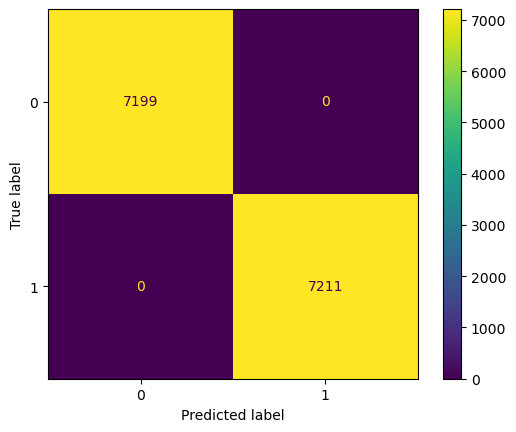

In [64]:
# plt.title('Random Forest Classifier')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

In [65]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

rfc_preds = rfc.predict(X_test) # Predictions
rfc_prob = rfc.predict_proba(X_test)[:,1] 

# THIS WILL BE USED FOR PR-CURVE

In [66]:
rfc_prob

array([0., 0., 1., ..., 0., 0., 1.])

In [67]:
accuracy= accuracy_score(y_test,rfc_preds)
print(f'Accuracy : {round(accuracy*100,2)}%')

Accuracy : 100.0%


In [68]:
precision_2,recall_2,threshold_2 = precision_recall_curve(y_test,rfc_prob)

In [69]:
auc_2 =auc(recall_2,precision_2)  
print(auc_2)

1.0


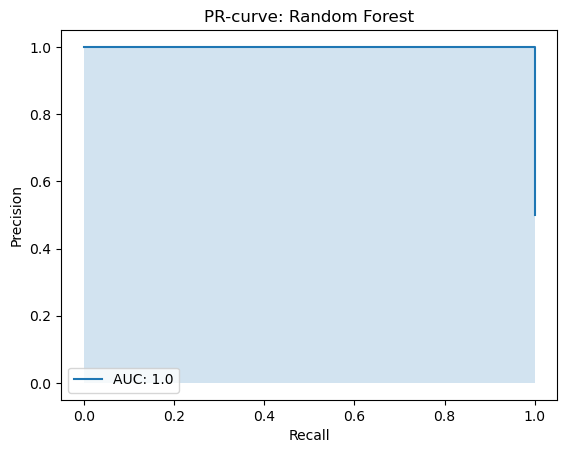

In [70]:
plt.title('PR-curve: Random Forest')

plt.plot(recall_2,precision_2,label=f'AUC: {round(auc_2,2)}')

plt.fill_between(recall_2,precision_2,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbc = GradientBoostingClassifier(learning_rate=0.01)

In [73]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [74]:
gbc_pred = gbc.predict(X_test)

In [75]:
gbc_accuracy = accuracy_score(y_test,gbc_pred)
gbc_recall = recall_score(y_test,gbc_pred)

In [76]:
gbc_accuracy*100

99.99306037473976

In [77]:
gbc_recall*100

99.98613229787824

In [78]:
cm = confusion_matrix(y_test,gbc_pred)

In [79]:
cm

array([[7199,    0],
       [   1, 7210]], dtype=int64)

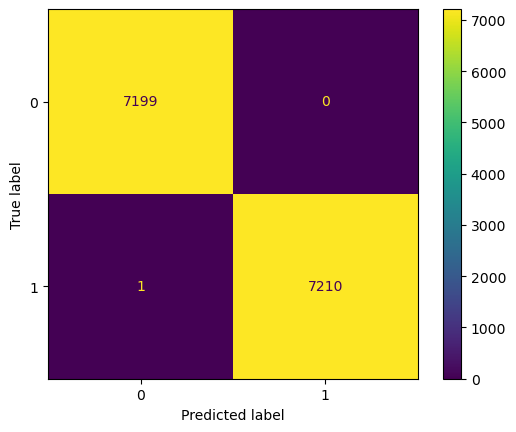

In [80]:
# plt.title('GradientBoosting')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gbc.classes_)
disp.plot()
plt.show()

In [81]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train,y_train)

grad_boost_preds = grad_boost.predict(X_test) # Predictions
grad_boost_prob = grad_boost.predict_proba(X_test)[:,1] 

# THIS WILL BE USED FOR PR-CURVE

In [82]:
grad_boost_prob

array([2.15099549e-05, 2.15099549e-05, 9.99977708e-01, ...,
       2.15099549e-05, 2.15099549e-05, 9.99977708e-01])

In [83]:
accuracy = accuracy_score(y_test,grad_boost_preds)
print(f'Accuracy : {round(accuracy*100,2)}%')

Accuracy : 99.99%


In [84]:
precision_3,recall_3,threshold_3 = precision_recall_curve(y_test,grad_boost_prob)

In [85]:
auc_3 =auc(recall_3,precision_3)  
print(auc_3)

0.999971706147483


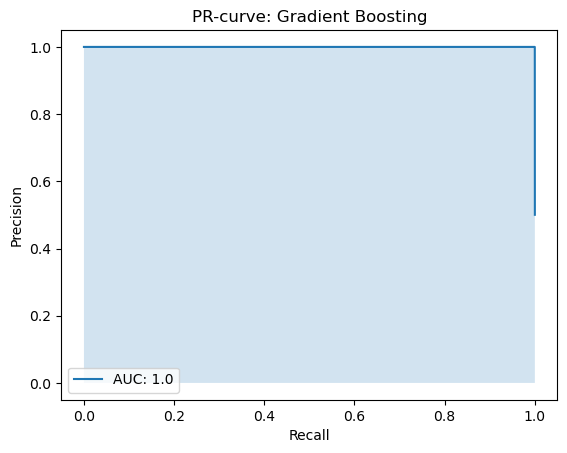

In [86]:
plt.title('PR-curve: Gradient Boosting')

plt.plot(recall_3,precision_3,label=f'AUC: {round(auc_3,2)}')

plt.fill_between(recall_3,precision_3,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Logistic Regression (LR)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
logit = LogisticRegression(penalty = 'l1', solver='liblinear')

In [89]:
logit.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [90]:
logit_pred = logit.predict(X_test)

In [91]:
logit_accuracy = accuracy_score(y_test,logit_pred)
logit_recall = recall_score(y_test,logit_pred)

In [92]:
logit_accuracy*100

100.0

In [93]:
logit_recall*100

100.0

In [94]:
cm = confusion_matrix(y_test,logit_pred)

In [95]:
cm

array([[7199,    0],
       [   0, 7211]], dtype=int64)

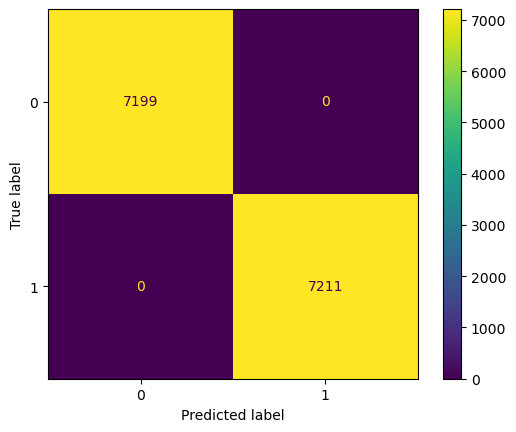

In [96]:
# plt.title('Logistic Regression')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logit.classes_)
disp.plot()
plt.show()

In [97]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train,y_train)

log_reg_preds = log_reg.predict(X_test) # Predictions
log_reg_prob = log_reg.predict_proba(X_test)[:,1] 

# THIS WILL BE USED FOR PR-CURVE 

In [98]:
log_reg_prob

array([4.99871005e-05, 1.36840388e-08, 9.99912624e-01, ...,
       1.55851973e-05, 1.76211393e-08, 9.99998363e-01])

In [99]:
accuracy = accuracy_score(y_test,log_reg_preds)
print(f'Accuracy : {round(accuracy*100,2)}%')

Accuracy : 100.0%


In [100]:
precision_4,recall_4,threshold_4 = precision_recall_curve(y_test,log_reg_prob)

In [101]:
auc_4 =auc(recall_4,precision_4)  
print(auc_4)

1.0


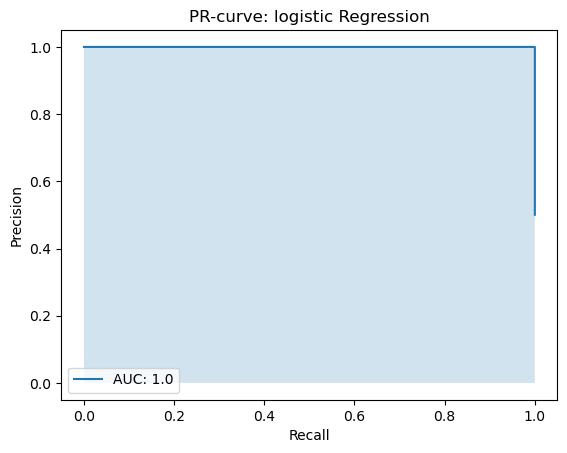

In [102]:
plt.title('PR-curve: logistic Regression')
plt.plot(recall_4,precision_4,label=f'AUC: {round(auc_4,2)}')

plt.fill_between(recall_4,precision_4,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# MODEL PERFORMANCE

## ==> Comparing all four charts/plots

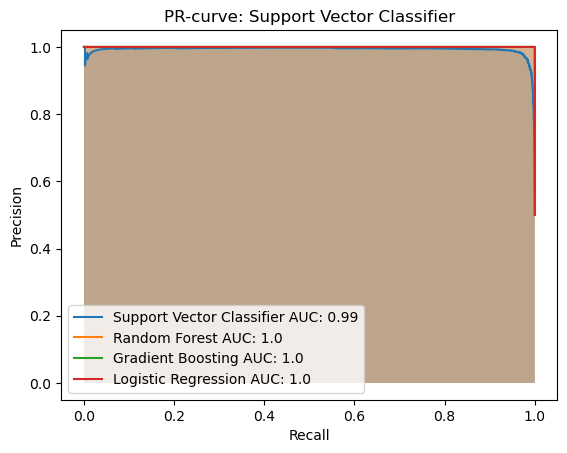

In [103]:
plt.title('PR-curve: Support Vector Classifier')

# Support Vector Classifier
plt.plot(recall_1,precision_1,label=f'Support Vector Classifier AUC: {round(auc_1,2)}')
plt.fill_between(recall_1,precision_1,alpha=0.2)

# Random Forest
plt.plot(recall_2,precision_2,label=f'Random Forest AUC: {round(auc_2,2)}')
plt.fill_between(recall_2,precision_2,alpha=0.2)

# Gradient Boosting
plt.plot(recall_3,precision_3,label=f'Gradient Boosting AUC: {round(auc_3,2)}')
plt.fill_between(recall_3,precision_3,alpha=0.2)

# Logistic Regression
plt.plot(recall_4,precision_4,label=f'Logistic Regression AUC: {round(auc_4,2)}')
plt.fill_between(recall_4,precision_4,alpha=0.2)

# plt.fill_between(recall_1,precision_1,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()